# Bibliotecas

In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import cv2

# Metadata Datasets

In [3]:
list_metadata = []

soma = 0

for i in range(5):
    df_ = pd.read_json(f"../datasets/dfdc_train_part_{i}/dfdc_train_part_{i}/metadata.json").T
    print(f"{df_.label.value_counts()}\n")
    soma += df_.shape[0]
    list_metadata.append(df_)

df_labels = pd.concat(list_metadata)

df_labels.head()

ValueError: Expected object or value

**Verificação da concatenação**

In [42]:
soma == df_labels.shape[0]

True

**Quantidade de dados**

In [43]:
print(df_labels.shape[0])

7937


### Distribuição dos videos

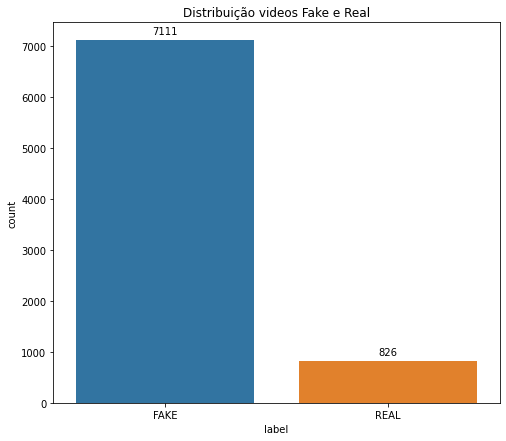

In [44]:
fig,ax = plt.subplots(figsize=(8,7))
bar = sns.countplot(data=df_labels,x="label")

for i,p in enumerate(bar.patches):
    bar.annotate(f'{p.get_height()}', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
ax.set_title("Distribuição videos Fake e Real")
plt.show()

In [45]:
def getDuration():
    aux_list = []
    for i in range(5):
        path = f"../datasets/dfdc_train_part_{i}/dfdc_train_part_{i}"
        files_names = os.listdir(path)
        for file_name in tqdm(files_names,total=len(files_names)):
            if(".mp4" in file_name):
                vidcapture = cv2.VideoCapture(f"{path}/{file_name}")
                fps = vidcapture.get(cv2.CAP_PROP_FPS)
                totalNoFrames = vidcapture.get(cv2.CAP_PROP_FRAME_COUNT);
                durationInSeconds = int(float(totalNoFrames) / float(fps))
                aux_list.append([
                    file_name,
                    durationInSeconds
                ])
    return pd.DataFrame(aux_list,columns=["file_name","duration"])

In [46]:
df_duration = getDuration()

100%|█████████████████████████████| 1702/1702 [00:31<00:00, 54.60it/s]


In [47]:
df_labels.reset_index(inplace=True)
df_labels.rename({"index":"file_name"},inplace=True,axis=1)

In [48]:
df = df_labels.merge(df_duration,on="file_name")

<AxesSubplot:xlabel='duration', ylabel='Count'>

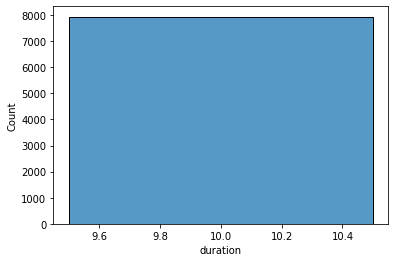

In [50]:
sns.histplot(data=df,x="duration")